### Import dependencies

In [99]:
import os
from path import Path
import pickle
import numpy as np
import pandas as pd
import spacy
import seaborn as sns; sns.set()
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt

### Load in the data

In [ ]:
data = 'Resources/mbti_clean.csv'
df = pd.read_csv(data)
df.head(10)

### Remove stopwords

In [63]:
def remove_stopwords(post):
    tokenizer = RegexpTokenizer(r'\w+')
    words = [word.lower() for word in tokenizer.tokenize(post)]
    words = [word for word in words if word not in stopwords.words('english')]
    return np.array(words)
    

In [80]:
X = df["posts"].apply(remove_stopwords).values
y = df["type"].values

### Split the dataset into training and testing sets

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(212844,)

In [82]:
y_train.shape

(212844,)

### Create a datapipeline 

In [106]:
from sklearn import (datasets, feature_extraction, pipeline, linear_model,
metrics, model_selection, feature_selection)

text_clf_svm = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k='all')),
                         ('clf', linear_model.SGDClassifier(random_state=42, verbose=5, max_iter=10000)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 2.37, NNZs: 14941, Bias: -1.033359, T: 212844, Avg. loss: 0.048840
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 1.77, NNZs: 17988, Bias: -1.018973, T: 425688, Avg. loss: 0.046179
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.56, NNZs: 20614, Bias: -1.014455, T: 638532, Avg. loss: 0.045925
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 1.44, NNZs: 22669, Bias: -1.011746, T: 851376, Avg. loss: 0.045825
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 24441, Bias: -1.011005, T: 1064220, Avg. loss: 0.045771
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 1.31, NNZs: 25909, Bias: -1.009314, T: 1277064, Avg. loss: 0.045735
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 1.27, NNZs: 27182, Bias: -1.008287, T: 1489908, Avg. loss: 0.045712
Total training time: 0.27 seconds.
Convergence after 7 epochs took 0.27 seconds
-- Epoch 1
Norm: 4.05, NNZs: 32812, Bias: -1.030255, T: 212844, Avg. loss: 0.169603
Total training time: 0.04 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Norm: 2.57, NNZs: 48906, Bias: -1.007578, T: 851376, Avg. loss: 0.158124
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 2.45, NNZs: 52090, Bias: -1.005736, T: 1064220, Avg. loss: 0.157921
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 2.37, NNZs: 54583, Bias: -1.005476, T: 1277064, Avg. loss: 0.157801
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 2.30, NNZs: 56589, Bias: -1.005089, T: 1489908, Avg. loss: 0.157712
Total training time: 0.29 seconds.
Convergence after 7 epochs took 0.29 seconds
-- Epoch 1
Norm: 2.60, NNZs: 17764, Bias: -1.027145, T: 212844, Avg. loss: 0.057174
Total training time: 0.04 seconds.
-- Epoch 2


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Norm: 1.97, NNZs: 21585, Bias: -1.017055, T: 425688, Avg. loss: 0.054107
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.73, NNZs: 24705, Bias: -1.012171, T: 638532, Avg. loss: 0.053819
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 1.60, NNZs: 27118, Bias: -1.010454, T: 851376, Avg. loss: 0.053702
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 29172, Bias: -1.009775, T: 1064220, Avg. loss: 0.053637
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.46, NNZs: 30837, Bias: -1.008565, T: 1277064, Avg. loss: 0.053597
Total training time: 0.23 seconds.
-- Epoch 7
Norm: 1.42, NNZs: 32199, Bias: -1.006889, T: 1489908, Avg. loss: 0.053570
Total training time: 0.27 seconds.
Convergence after 7 epochs took 0.27 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


-- Epoch 1
Norm: 4.11, NNZs: 34747, Bias: -1.025801, T: 212844, Avg. loss: 0.165579
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 3.15, NNZs: 41949, Bias: -1.014089, T: 425688, Avg. loss: 0.156204
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 2.80, NNZs: 47263, Bias: -1.008060, T: 638532, Avg. loss: 0.155333
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 2.60, NNZs: 51151, Bias: -1.007767, T: 851376, Avg. loss: 0.154994
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 2.48, NNZs: 54205, Bias: -1.006455, T: 1064220, Avg. loss: 0.154789
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 2.40, NNZs: 56661, Bias: -1.004248, T: 1277064, Avg. loss: 0.154669
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 2.34, NNZs: 58678, Bias: -1.003304, T: 1489908, Avg. loss: 0.154588
Total training time: 0.28 seconds.
Convergence after 7 epochs took 0.28 seconds
-- Epoch 1
Norm: 1.28, NNZs: 5460, Bias: -1.051883, T: 212844, Avg. loss: 0.010895
Total training time: 0.04 seconds.
-

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


Norm: 0.77, NNZs: 8990, Bias: -1.015230, T: 1064220, Avg. loss: 0.010164
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 9611, Bias: -1.012812, T: 1277064, Avg. loss: 0.010157
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.23 seconds
-- Epoch 1
Norm: 1.24, NNZs: 5658, Bias: -1.033707, T: 212844, Avg. loss: 0.009364
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.97, NNZs: 6925, Bias: -1.021443, T: 425688, Avg. loss: 0.008920
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 8083, Bias: -1.015983, T: 638532, Avg. loss: 0.008877
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 0.80, NNZs: 9057, Bias: -1.013948, T: 851376, Avg. loss: 0.008859
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 0.77, NNZs: 9837, Bias: -1.011436, T: 1064220, Avg. loss: 0.008850
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.74, NNZs: 10599, Bias: -1.010620, T: 1277064, Avg. loss: 0.008844
Total training time: 0.22 seconds.
Convergence after

Norm: 1.43, NNZs: 26908, Bias: -1.009094, T: 1064220, Avg. loss: 0.047150
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 1.38, NNZs: 28628, Bias: -1.007813, T: 1277064, Avg. loss: 0.047109
Total training time: 0.22 seconds.
-- Epoch 7
Norm: 1.35, NNZs: 29970, Bias: -1.006787, T: 1489908, Avg. loss: 0.047087
Total training time: 0.27 seconds.
Convergence after 7 epochs took 0.27 seconds
-- Epoch 1
Norm: 2.98, NNZs: 21514, Bias: -1.024692, T: 212844, Avg. loss: 0.078313
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 2.25, NNZs: 26129, Bias: -1.019790, T: 425688, Avg. loss: 0.074115
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.98, NNZs: 29651, Bias: -1.014466, T: 638532, Avg. loss: 0.073716
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 1.83, NNZs: 32449, Bias: -1.009887, T: 851376, Avg. loss: 0.073553
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 1.74, NNZs: 34692, Bias: -1.007777, T: 1064220, Avg. loss: 0.073462
Total training time: 0.19 seconds.
-- Epoch 6

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.6s finished


### Stats for SVM

In [92]:
predicted_svm = text_clf_svm.predict(X_test)
print("Training set score: %f" % text_clf_svm.score(X_train, y_train))
print("Test set score: %f" % text_clf_svm.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_svm.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
% (X_test.shape[0],(y_test != predicted_svm).sum()))

Training set score: 0.547941
Test set score: 0.247984
Test error rate: 0.752016
Number of mislabeled points out of a total 70948 points for the Linear SVM algorithm: 53354


### Create dataframe of actual vs predictions

In [93]:
y_pred = predicted_svm
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()


,Prediction,Actual
0,ENTP,ENTP
1,INFJ,INTJ
2,INFJ,ISFP
3,INTJ,INFJ
4,INFP,INTP


### Accuracy Score

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.24798443930766195

### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.11      0.09      0.10      1620
        ENFP       0.20      0.15      0.17      5590
        ENTJ       0.09      0.08      0.09      1899
        ENTP       0.19      0.17      0.18      5481
        ESFJ       0.03      0.04      0.04       360
        ESFP       0.02      0.02      0.02       314
        ESTJ       0.05      0.05      0.05       313
        ESTP       0.09      0.05      0.07       674
        INFJ       0.29      0.28      0.28     12604
        INFP       0.31      0.43      0.36     15146
        INTJ       0.23      0.22      0.22      8777
        INTP       0.26      0.26      0.26     10518
        ISFJ       0.15      0.10      0.12      1359
        ISFP       0.11      0.08      0.09      2022
        ISTJ       0.12      0.07      0.09      1670
        ISTP       0.13      0.12      0.12      2601

    accuracy                           0.25     70948
   macro avg       0.15   

### Heatmap #1

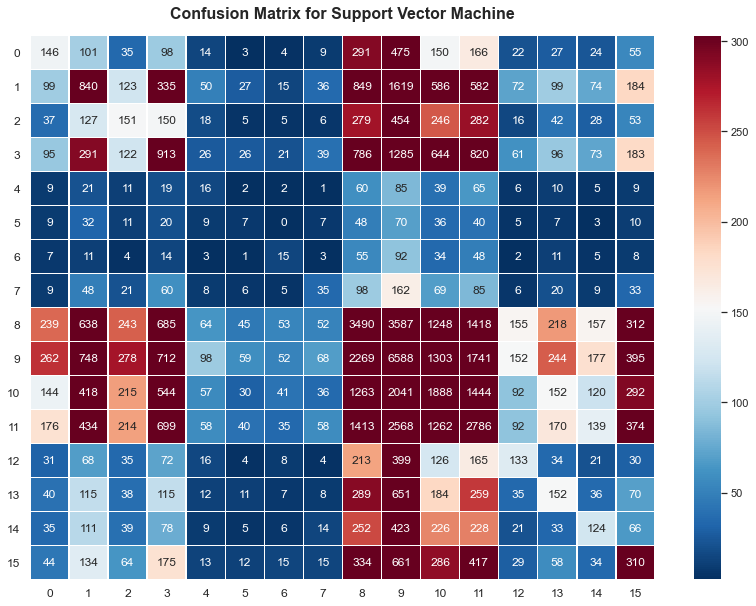

In [102]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(14,10)) 
plt.title('Confusion Matrix for Support Vector Machine', fontsize=16,
          fontweight='bold', y=1.02)
sns.heatmap(mat.T, robust=True, annot=True, linewidth=0.5, 
            fmt='', cmap='RdBu_r', vmax=303, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12);

### Heatmap #2

In [ ]:

cm_randomforest = pd.DataFrame(cm_rfc, index=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP',
                                       'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP',
                                       'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                            columns=['predict_ENFJ','predict_ENFP','predict_ENTJ',
                                     'predict_ENTP','predict_ESFJ','predict_ESFP',
                                     'predict_ESTJ','predict_ESTP','predict_INFJ',
                                     'predict_INFP','predict_INTJ','predict_INTP',
                                     'predict_ISFJ','predict_ISFP','predict_ISTJ',
                                     'predict_ISTP'])

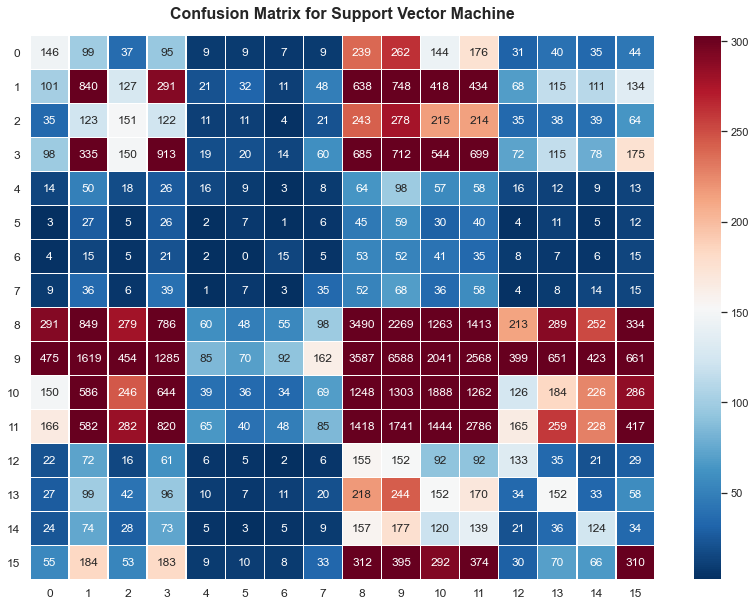

In [103]:
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(14,10)) 
plt.title('Confusion Matrix for Support Vector Machine', fontsize=16,
          fontweight='bold', y=1.02)
sns.heatmap(mat.T, robust=True, annot=True, linewidth=0.5, 
            fmt='', cmap='RdBu_r', vmax=303, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12);